# Modus

In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from datetime import datetime, timedelta
import fnmatch
import os

import sys
sys.path.append( './helper/' )
from XperimentPlotter import XperimentPlotter, Data
from Colormap import Colormap

2024-01-23 16:20:55.485487: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 16:20:55.518390: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 16:20:55.518422: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 16:20:55.519430: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 16:20:55.525013: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 16:20:55.525819: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
plt.rcParams['text.usetex'] = True
fontsize = 12
baseFigurePath = './tmp/figures'

## Figure 4.6

In [3]:
path = '../data/017otrScanNear/'
data = []
height = ['133,6 cm', '138,3 cm', '112,6 cm', '112,6 cm', '137,6 cm', '135,3 cm', '138.2 cm', '135.8 cm', '127.7 cm', '126.5 cm', '112.6 cm']
for file in os.listdir(path):
    if fnmatch.fnmatch(file, '0*.csv'):
        data.append(Data(pd.read_csv(f'{path}{file}', skiprows=6, sep='\t'), f'{file}'))

/tmp/ipykernel_139213/1161293819.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_139213/1161293819.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


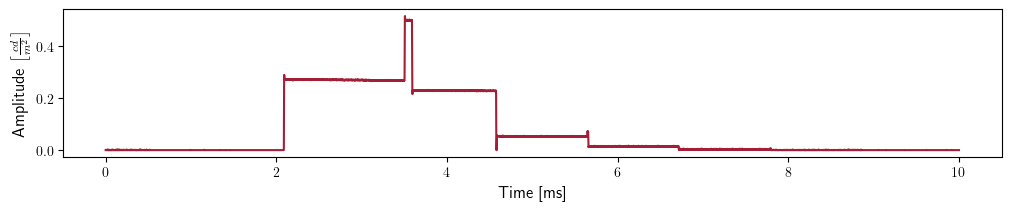

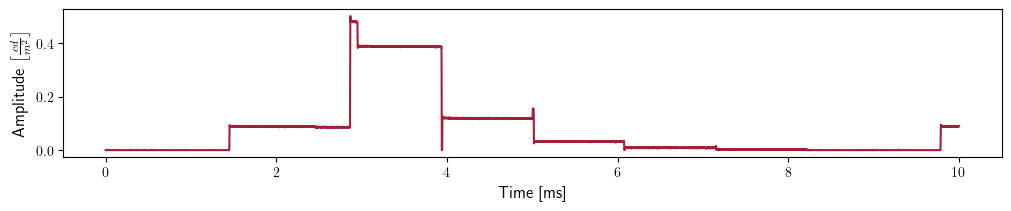

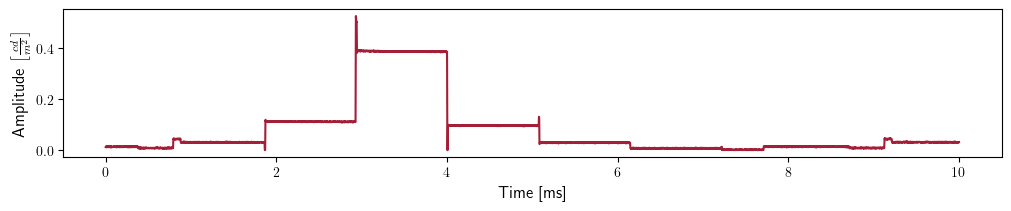

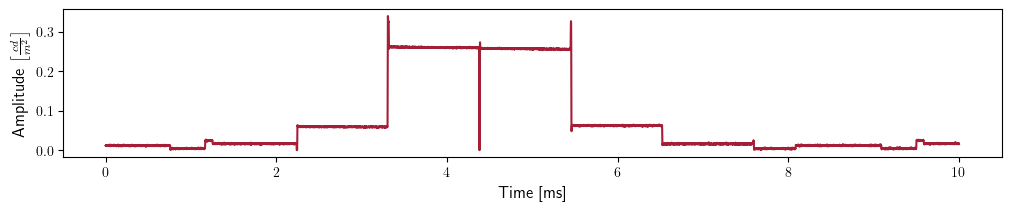

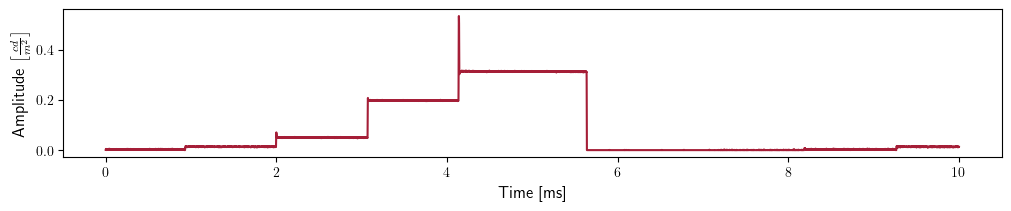

In [4]:
i = 0
for d in data:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 2), layout='constrained')
    
    axes.plot(1000*d.dataframe['Time [s]'], d.dataframe['Amplitude'], color=Colormap.red)
    axes.set_xlabel('Time [ms]', fontsize=fontsize)
    axes.set_ylabel(r'Amplitude $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
    
    figurePath = f'{baseFigurePath}/03_02Modus/measurment_0{i}.pdf'
    fig.show()
    fig.savefig(figurePath, format='pdf')
    i += 1

## Figure 4.9

In [5]:
path = '../data/020OTRAmplitude/'
data = []
for file in os.listdir(path):
    if fnmatch.fnmatch(file, '00*.csv'):
        data.append(Data(pd.read_csv(f'{path}{file}', skiprows=6, sep='\t'), f'{file}'))

/tmp/ipykernel_139213/1798018541.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


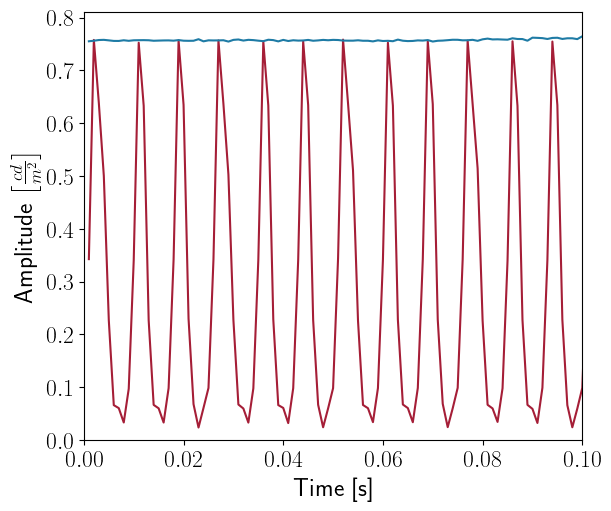

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), layout='constrained')
fontsize = 18

axes.plot(data[1].dataframe['Time [s]'], data[1].dataframe['Amplitude'], color=Colormap.red)
axes.plot(data[0].dataframe['Time [s]'], data[0].dataframe['Amplitude'], color=Colormap.blue)
# axes.set_title(f'{d.name}')
axes.set_xlabel('Time [s]', fontsize=fontsize)
axes.set_ylabel(r'Amplitude $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

# set limit
axes.set_xlim(0,0.1)
axes.set_ylim(0, 0.81)
figurePath = f'{baseFigurePath}/03_02Modus/amplitude_2_part.png'
fig.show()
fig.savefig(figurePath, dpi=300)

## Figures 4.11

In [7]:
# get the normal curve
path = '../data/015tempDependency1'
data_nm_curves = []

startingdate_str = '2023-08-09 12:41:59'
startingdate = datetime.strptime(startingdate_str, '%Y-%m-%d %H:%M:%S')
duration = 144 #sec
for i in range(1,51):
    data_nm_curves.append(XperimentPlotter.ReadData(f'{path}/Test{i:02}/', f'015 Test{i} (nm, ascending)', [(startingdate + timedelta(seconds=duration*i)).strftime('%Y-%m-%d %H:%M'), (startingdate + timedelta(seconds=duration*(i+1))).strftime('%Y-%m-%d %H:%M')]))

mergedDataTemps_nm = []
for d in data_nm_curves:
    mergedDataTemps_nm.append(XperimentPlotter.mergeTempsInData(d, f'{path}/Test50'))

temp_nm = []
for d in mergedDataTemps_nm:
    temp_nm.append([d.name, d.dataframe, d.dataframe["temps"].mean()])

/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '27.375' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  d.dataframe.loc[i, 'temps'] = row.temps
/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30.3125' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  d.dataframe.loc[i, 'temps'] = row.temps
/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:171: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '32.75' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  d.dataframe.fillna(lasttemp, inp

In [8]:
# get the scanning curve
path = '../data/015tempDependency2'
data_sc_curves = []

startingdate_str = '2023-08-09 21:55:06'
startingdate = datetime.strptime(startingdate_str, '%Y-%m-%d %H:%M:%S')
duration = 144 #sec
for i in range(1,51):
    data_sc_curves.append(XperimentPlotter.ReadData(f'{path}/Test{i:02}/', f'015 Test{i} (sc, ascending)', [(startingdate + timedelta(seconds=duration*i)).strftime('%Y-%m-%d %H:%M'), (startingdate + timedelta(seconds=duration*(i+1))).strftime('%Y-%m-%d %H:%M')]))

mergedDataTemps_sc = []
for d in data_sc_curves:
    mergedDataTemps_sc.append(XperimentPlotter.mergeTempsInData(d, f'{path}/Test50'))

temp_sc = []
for d in mergedDataTemps_sc:
    tmp = d.dataframe["temps"].mean()
    temp_sc.append([d.name, d.dataframe, d.dataframe["temps"].mean()])

/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:171: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '26.125' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  d.dataframe.fillna(lasttemp, inplace=True)
/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '27.125' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  d.dataframe.loc[i, 'temps'] = row.temps
/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '28.0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  d.dataframe.loc[i, 'temps'] = r

In [9]:
# find experiments where the same temperature prevailed
for j,d in enumerate(temp_sc):
    for i,t in enumerate(temp_nm):
        if (d[2] == t[2]):
            print(f'{d[2]} (tmp_sc[{j}]) == {t[2]} (tmp_nm[{i}]))')

35.125 (tmp_sc[15]) == 35.125 (tmp_nm[4]))


In [10]:
compare_sc = temp_sc[15][1]
print(temp_sc[15][0])
compare_nm = temp_nm[4][1]
print(temp_nm[4][0])

015 Test16 (sc, ascending)
015 Test5 (nm, ascending)


In [11]:
merged = pd.merge(compare_sc, compare_nm, on=['levels'])
dif = merged['mean_x'] / merged['mean_y']
print(f'mean={dif.mean()}')

mean=0.3861468050208664


/tmp/ipykernel_139213/400061945.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


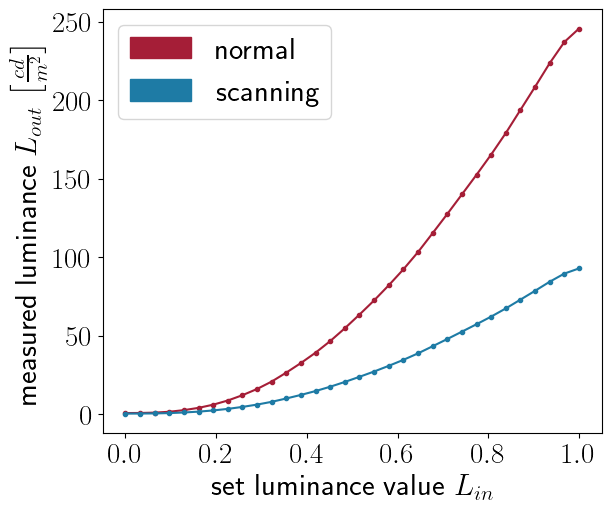

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), layout='constrained')
fontsize = 22

## Note: Maybe a better alternative for the scatter in Levels?
axes.plot(compare_nm['levels'], compare_nm['mean'], marker='.', label='normal', c=Colormap.map[0])
axes.plot(compare_sc['levels'], compare_sc['mean'], marker='.', label='scanning', c=Colormap.map[1])

# axes.set_title(title, fontsize=fontsize)
axes.set_xlabel(r'set luminance value $L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'measured luminance $L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

##generating custom legend
handles, labels = axes.get_legend_handles_labels()
patches = []
for handle, label in zip(handles, labels):
    patches.append(mpatches.Patch(color=handle.get_color(), label=label))

legend = axes.legend(handles=patches, fontsize=fontsize)

figurePath = f'{baseFigurePath}/03_02Modus/ComparissonCurves.png'
fig.show()
fig.savefig(figurePath, dpi=300)

## Figure 4.10

/tmp/ipykernel_139213/2297464485.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


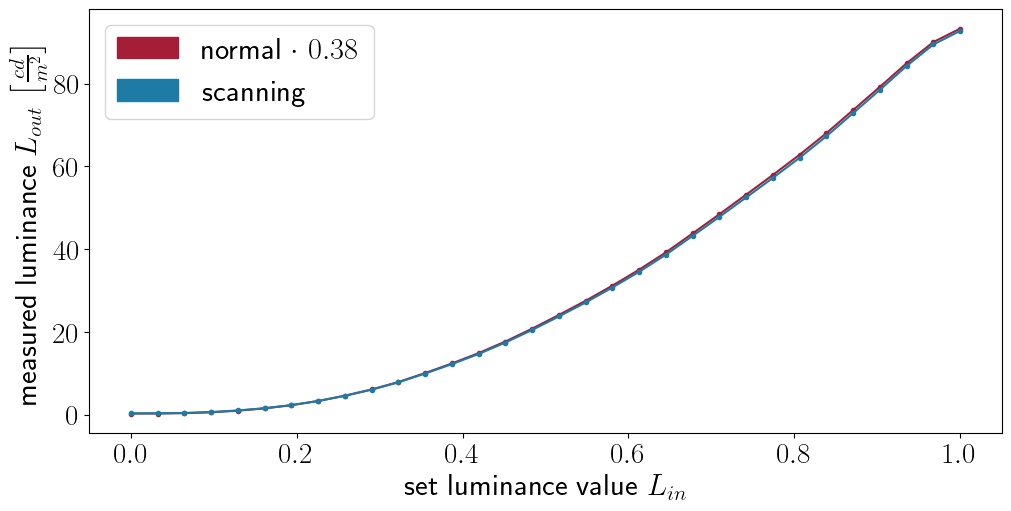

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), layout='constrained')
fontsize=22

axes.plot(compare_nm['levels'], compare_nm['mean']*0.38, marker='.', label=r'normal $\cdot$ $0.38$', c=Colormap.map[0])
axes.plot(compare_sc['levels'], compare_sc['mean'], marker='.', label='scanning', c=Colormap.map[1])

axes.set_xlabel(r'set luminance value $L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'measured luminance $L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

# generating custom legend
handles, labels = axes.get_legend_handles_labels()
patches = []
for handle, label in zip(handles, labels):
    patches.append(mpatches.Patch(color=handle.get_color(), label=label))

legend = axes.legend(handles=patches, fontsize=fontsize)

figurePath = f'{baseFigurePath}/03_02Modus/ComparissonCurvesDivFactor.png'
fig.show()
fig.savefig(figurePath, dpi=300)